In [1]:
# data analysis and wrangling/ visualization/machine learning
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('fragandlead-forML.csv')

In [3]:
#drop unwanted columns associated with lead-likeness 
df = df.drop(['Plane of best fit', 'Aliphatic rings', 'Aromatic rings', 'tPSA', 'Carbon sp3 fraction','PMI x (I1)', 'PMI y (I2)', 'Lipinski rule-of-5 failures', 'Heteroatoms', 'Chiral centres', 'Rotatable bonds','Murcko framework', 'Murcko framework with alpha atoms',  'Canonical SMILES','Type','Molecule ID','Parent molecule 1 ID', 'Parent molecule 1 canonical SMILES', 'Lead-likeness penalty', 'Parent molecule 2 ID', 'Parent molecule 2 canonical SMILES', 'Product of reaction' ], axis=1)
df.head() 

,RMM,AlogP,Heavy atoms
0,354.440,0.09,24
1,299.361,0.30,20
2,367.435,0.86,25
3,371.424,0.27,25
4,425.497,1.28,28


In [4]:
#define lead-like space
import numpy as np
HAC = df['Heavy atoms']
AlogP =df['AlogP']
df['Lead-Like'] = np.where(((HAC >= 15) & (HAC <= 26) & (AlogP >= -1) & (AlogP <= 3)), '1', '0')
df.head()

,RMM,AlogP,Heavy atoms,Lead-Like
0,354.440,0.09,24,1
1,299.361,0.30,20,1
2,367.435,0.86,25,1
3,371.424,0.27,25,1
4,425.497,1.28,28,0


In [5]:
df['Fragment-Like'] = np.where(((HAC<=14) & (AlogP >= -1) & (AlogP <= 2)), '1', '0')
df.head(50)

,RMM,AlogP,Heavy atoms,Lead-Like,Fragment-Like
0,354.440,0.09,24,1,0
1,299.361,0.30,20,1,0
2,367.435,0.86,25,1,0
3,371.424,0.27,25,1,0
4,425.497,1.28,28,0,0
5,391.460,1.38,27,0,0
6,396.499,1.95,26,1,0
7,366.493,1.98,25,1,0
8,433.496,2.01,30,0,0
9,437.551,0.99,29,0,0


In [6]:
df['Drug-Like'] = np.where(((HAC>=27)  & (AlogP <= 5)), '1', '0')
df.head(50)

,RMM,AlogP,Heavy atoms,Lead-Like,Fragment-Like,Drug-Like
0,354.440,0.09,24,1,0,0
1,299.361,0.30,20,1,0,0
2,367.435,0.86,25,1,0,0
3,371.424,0.27,25,1,0,0
4,425.497,1.28,28,0,0,1
5,391.460,1.38,27,0,0,1
6,396.499,1.95,26,1,0,0
7,366.493,1.98,25,1,0,0
8,433.496,2.01,30,0,0,1
9,437.551,0.99,29,0,0,1


In [7]:
LL = df['Lead-Like']
FL = df['Fragment-Like']
DL = df['Drug-Like']

df['Outside required space'] =np.where(((LL=='0')  & (FL == '0') & (DL == '0')), '1', '0')
df.head(50)

,RMM,AlogP,Heavy atoms,Lead-Like,Fragment-Like,Drug-Like,Outside required space
0,354.440,0.09,24,1,0,0,0
1,299.361,0.30,20,1,0,0,0
2,367.435,0.86,25,1,0,0,0
3,371.424,0.27,25,1,0,0,0
4,425.497,1.28,28,0,0,1,0
5,391.460,1.38,27,0,0,1,0
6,396.499,1.95,26,1,0,0,0
7,366.493,1.98,25,1,0,0,0
8,433.496,2.01,30,0,0,1,0
9,437.551,0.99,29,0,0,1,0


In [8]:
df1 = df.loc[df['Outside required space'] == '1']
df1.head()

,RMM,AlogP,Heavy atoms,Lead-Like,Fragment-Like,Drug-Like,Outside required space
50,114.146,-1.31,8,0,0,0,1
51,199.250,-1.05,14,0,0,0,1
58,164.226,-1.28,10,0,0,0,1
71,182.306,2.02,13,0,0,0,1
81,216.107,3.19,13,0,0,0,1


In [37]:
df1[['Outside required space']].count().sum()

35

In [10]:
df['Lead-Like'] = df['Lead-Like'].astype(np.int64)
df['Drug-Like'] = df['Drug-Like'].astype(np.int64)
df['Fragment-Like'] = df['Fragment-Like'].astype(np.int64)
df['Outside required space'] = df['Outside required space'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 7 columns):
RMM                       1812 non-null float64
AlogP                     1812 non-null float64
Heavy atoms               1812 non-null int64
Lead-Like                 1812 non-null int64
Fragment-Like             1812 non-null int64
Drug-Like                 1812 non-null int64
Outside required space    1812 non-null int64
dtypes: float64(2), int64(5)
memory usage: 99.2 KB


In [11]:
#dummies = df[['Lead-Like','Fragment-Like', 'Drug-Like']]
#dummies = dummies.astype(np.int64)
#dummies.info()

In [12]:
#dummies.head()

In [13]:
#categorise (or in other terms reverse hot-one encode / reverse dummies)
df['chemical space']= pd.DataFrame([x for x in np.where(df[['Lead-Like','Fragment-Like', 'Drug-Like', 'Outside required space']] ==1, df[['Lead-Like','Fragment-Like', 'Drug-Like', 'Outside required space']].columns,'').flatten().tolist() if len(x) >0],columns= (["chemical space"]) )
df.head(50)

,RMM,AlogP,Heavy atoms,Lead-Like,Fragment-Like,Drug-Like,Outside required space,chemical space
0,354.440,0.09,24,1,0,0,0,Lead-Like
1,299.361,0.30,20,1,0,0,0,Lead-Like
2,367.435,0.86,25,1,0,0,0,Lead-Like
3,371.424,0.27,25,1,0,0,0,Lead-Like
4,425.497,1.28,28,0,0,1,0,Drug-Like
5,391.460,1.38,27,0,0,1,0,Drug-Like
6,396.499,1.95,26,1,0,0,0,Lead-Like
7,366.493,1.98,25,1,0,0,0,Lead-Like
8,433.496,2.01,30,0,0,1,0,Drug-Like
9,437.551,0.99,29,0,0,1,0,Drug-Like


In [14]:
df = df.drop(['Lead-Like', 'Fragment-Like', 'Drug-Like', 'Outside required space'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 4 columns):
RMM               1812 non-null float64
AlogP             1812 non-null float64
Heavy atoms       1812 non-null int64
chemical space    1812 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 56.7+ KB


In [16]:
df.groupby(['chemical space'], as_index=False).mean()

,chemical space,RMM,AlogP,Heavy atoms
0,Drug-Like,466.317987,1.615301,32.047484
1,Fragment-Like,170.132852,0.830250,12.000000
2,Lead-Like,333.739972,0.912730,22.907975
3,Outside required space,249.817029,2.656286,17.657143


In [36]:
df.groupby(['chemical space'], as_index=False).count()

,chemical space,RMM,AlogP,Heavy atoms
0,Drug-Like,1411,1411,1411
1,Fragment-Like,40,40,40
2,Lead-Like,326,326,326
3,Outside required space,35,35,35


In [38]:
df.head(20)

,RMM,AlogP,Heavy atoms,chemical space
0,354.440,0.09,24,Lead-Like
1,299.361,0.30,20,Lead-Like
2,367.435,0.86,25,Lead-Like
3,371.424,0.27,25,Lead-Like
4,425.497,1.28,28,Drug-Like
5,391.460,1.38,27,Drug-Like
6,396.499,1.95,26,Lead-Like
7,366.493,1.98,25,Lead-Like
8,433.496,2.01,30,Drug-Like
9,437.551,0.99,29,Drug-Like


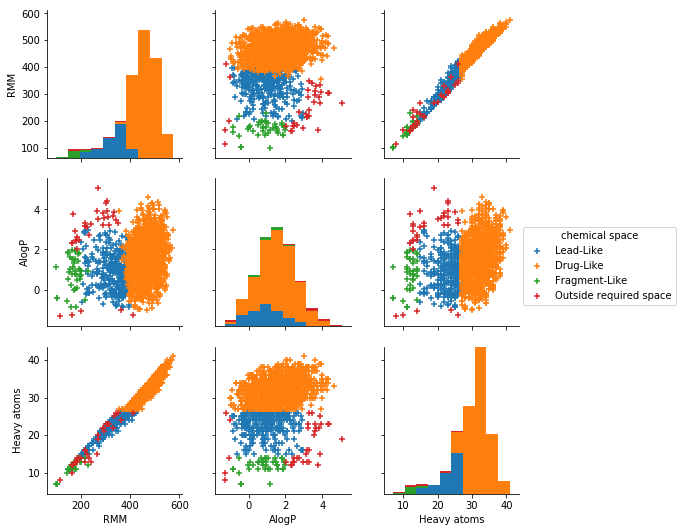

In [19]:
pairplot = sns.pairplot(df, hue='chemical space', markers='+')
plt.show()

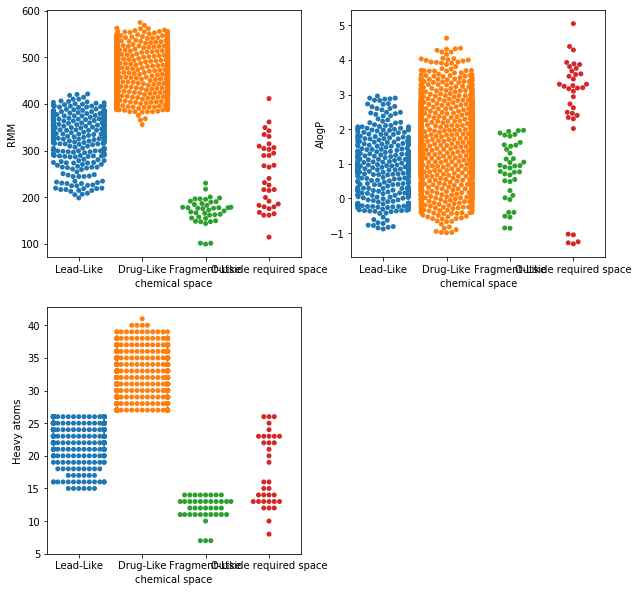

In [20]:
#
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df.columns):
    if column == 'chemical space':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.swarmplot(x='chemical space', y=column, data=df)

In [21]:
#pick X and Y for modeling
X = df.drop(['chemical space'], axis=1)
y = df['chemical space']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(1812, 3)
(1812,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1268, 3)
(1268,)
(544, 3)
(544,)


In [23]:
#Logistic Regression#Logistic 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_test, y_test)
acc_log

0.8676470588235294

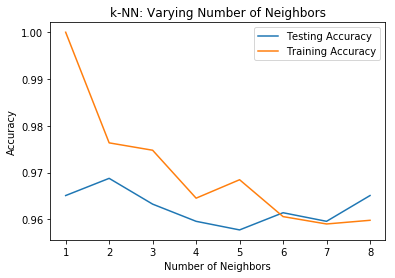

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
#KNN for n=3#KNN for  
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
acc_knn

0.9595588235294118

In [26]:
# Support Vector Machines# Suppor 
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
acc_svc

0.9375

In [27]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_test, y_test)
acc_gaussian

0.9613970588235294

In [28]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = perceptron.score(X_test, y_test)
acc_perceptron

/Users/bobbylowe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7794117647058824

In [29]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = linear_svc.score(X_test, y_test)
acc_linear_svc

0.8051470588235294

In [30]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = sgd.score(X_test, y_test)
acc_sgd

/Users/bobbylowe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7794117647058824

In [31]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_test, y_test)
acc_decision_tree

1.0

In [32]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_test, y_test)
acc_random_forest

1.0

In [33]:
#model evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,1.000000
8,Decision Tree,1.000000
1,KNN,0.963235
4,Naive Bayes,0.961397
0,Support Vector Machines,0.937500
2,Logistic Regression,0.867647
7,Linear SVC,0.805147
5,Perceptron,0.779412
6,Stochastic Gradient Decent,0.779412


In [42]:
# make a prediction for an example of an out-of-sample observation
#RMM	AlogP	Heavy atoms
decision_tree.predict([['320', '2.9', 25]])

array(['Lead-Like'], dtype=object)